In [3]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import xrUWLCM as xrU
import math

#from xhistogram.xarray import histogram
import xarray as xr

import matplotlib as mpl

pgsdir = '/home/piotr/praca/NextGEMS/LES_Smg/'
figoutdir = '/home/piotr/praca/NextGEMS/LES_Smg/figs/'
#scratchdir = '/net/tscratch/people/plgpdziekan/'
#ncoutdir = '/net/people/plgrid/plgpdziekan/wyniki/dycoms_rf01/netcdf/'


# UWLCM data diretories #

In [5]:
datadir = {}

datadir['dz50m'] = {}
datadir['dz50m']['dx5000m'] = {}
datadir['dz50m']['dx5000m']['Isotropic'] = pgsdir + "dycomsRF01_SMG_SgsDelta50_dx5000m_dz50m_X250km_longlong_out_blk_1m/"
datadir['dz50m']['dx5000m']['Anisotropic'] = pgsdir + "dycomsRF01_AnisoSmgAlong_dx5000m_dz50m_X250km_longlong_out_blk_1m/"

datadir['dz20m'] = {}
datadir['dz20m']['dx2000m'] = {}
#datadir['dz20m']['dx2000m']['Isotropic'] = pgsdir + "dycomsRF01_SMG_SgsDelta20_dx2000m_dz20m_X100km_longlong_out_blk_1m/"
datadir['dz20m']['dx2000m']['Isotropic'] = pgsdir + "singu_gh200_dycomsRF01_SMG_SgsDelta20m_dt1_dx2000m_dz20m_X574km_longlong_out_blk_1m/"
datadir['dz20m']['dx2000m']['Isotropic_H100'] = pgsdir + "singu_gh200_dycomsRF01_SMG_SgsDelta20m_dt1_dx2000m_dz20m_X100km_longlong_out_blk_1m/"
datadir['dz20m']['dx2000m']['Isotropic_tracers'] = pgsdir + "singu_gh200_dycomsRF01_SMG_SgsDelta20m_dt1_dx2000m_dz20m_X574km_NoWindow_tracers_longlong_out_blk_1m/"
datadir['dz20m']['dx2000m']['Isotropic_Window_tracers'] = pgsdir + "singu_gh200_dycomsRF01_SMG_SgsDelta20m_dt1_dx2000m_dz20m_X574km_Window_tracers_longlong_out_blk_1m/"
datadir['dz20m']['dx2000m']['Anisotropic'] = pgsdir + "dycomsRF01_AnisoSmgAlong_dx2000m_dz20m_X100km_longlong_out_blk_1m/"
datadir['dz20m']['dx2000m']['Anisotropic_H'] = pgsdir + "singu_gh200_dycomsRF01_AnisoSmgAlong_dt1_dx2000m_dz20m_X574km_longlong_out_blk_1m/"
datadir['dz20m']['dx2000m']['Anisotropic_tracers'] = pgsdir + "singu_gh200_dycomsRF01_AnisoSmgAlong_dt1_dx2000m_dz20m_X574km_NoWindow_tracers_longlong_out_blk_1m/"
datadir['dz20m']['dx2000m']['Anisotropic_Window_tracers'] = pgsdir + "singu_gh200_dycomsRF01_AnisoSmgAlong_dt1_dx2000m_dz20m_X574km_Window_tracers_longlong_out_blk_1m/"

datadir['dz20m']['dx1000m'] = {}
datadir['dz20m']['dx1000m']['Isotropic'] = pgsdir + "dycomsRF01_SMG_SgsDelta20_dx1000m_dz20m_X50km_longlong_out_blk_1m/"
datadir['dz20m']['dx1000m']['Anisotropic'] = pgsdir + "dycomsRF01_AnisoSmgAlong_dx1000m_dz20m_X50km_longlong_out_blk_1m/"

datadir['dz10m'] = {}
datadir['dz10m']['dx1000m'] = {}
datadir['dz10m']['dx1000m']['Isotropic'] = pgsdir + "dycomsRF01_SMG_SgsDelta10_dt1_dx1000m_dz10m_X100km_longlong_out_blk_1m/"
datadir['dz10m']['dx1000m']['Anisotropic'] = pgsdir + "singu_gh200_dycomsRF01_AnisoSmgAlong_dt0.25_dx1000m_dz10m_X287km_longlong_out_blk_1m/"

datadir['dz50m']['dx500m'] = {}
datadir['dz50m']['dx500m']['Isotropic'] = pgsdir + "dycomsRF01_SMG_SgsDelta50_dx500m_dz50m_X250km_longlong_out_blk_1m/"

datadir['dz20m']['dx500m'] = {}
datadir['dz20m']['dx500m']['Anisotropic'] = pgsdir + "dycomsRF01_AnisoSmgAlong_dx500m_dz20m_X50km_longlong_out_blk_1m/"

datadir['dz10m']['dx100m'] = {}
datadir['dz10m']['dx100m']['Isotropic'] = pgsdir + "dycomsRF01_SMG_SgsDelta10_dx100m_dz10m_X50km_longlong_out_blk_1m/"
datadir['dz10m']['dx100m']['Anisotropic'] = pgsdir + "dycomsRF01_AnisoSmgAlong_dx100m_dz10m_X50km_longlong_out_blk_1m/"
#datadir['dz10m']['dx100m']['AnisoSmgAlong_dt0.5'] = pgsdir + "dycomsRF01_AnisoSmgAlong_dt5e-1_dx100m_dz10m_X50km_longlong_out_blk_1m/"

datadir['dz5m'] = {}
datadir['dz5m']['dx50m'] = {}
datadir['dz5m']['dx50m']['Isotropic'] = pgsdir + "dycomsRF01_SMG_SgsDelta5_dt5e-1_dx50m_dz5m_X25km_longlong_out_blk_1m/"
datadir['dz5m']['dx50m']['Anisotropic'] = pgsdir + "dycomsRF01_AnisoSmgAlong_dt5e-1_dx50m_dz5m_X25km_longlong_out_blk_1m/"
datadir['dz5m']['dx50m']['Isotropic_Window'] = pgsdir + "singu_gh200_dycomsRF01_SMG_SgsDelta5_dt0.5_dx50m_dz5m_X25km_Window_longlong_out_blk_1m/"
datadir['dz5m']['dx50m']['Isotropic_Window_tracers'] = pgsdir + "singu_gh200_dycomsRF01_SMG_SgsDelta5m_dt0.5_dx50m_dz5m_X25km_Window_tracers_longlong_out_blk_1m/"
datadir['dz5m']['dx50m']['Anisotropic_Window'] = pgsdir + "singu_gh200_dycomsRF01_AnisoSmgAlong_dt0.5_dx50m_dz5m_X25km_Window_longlong_out_blk_1m/"
datadir['dz5m']['dx50m']['Anisotropic_Window_tracers'] = pgsdir + "singu_gh200_dycomsRF01_AnisoSmgAlong_dt0.5_dx50m_dz5m_X25km_Window_tracers_longlong_out_blk_1m/"

datadir['dz2.5m'] = {}
datadir['dz2.5m']['dx25m'] = {}
datadir['dz2.5m']['dx25m']['Isotropic'] = pgsdir + "dycomsRF01_SMG_SgsDelta2.5_dt0.25_dx25m_dz2.5m_X12.5km_longlong_out_blk_1m/"
datadir['dz2.5m']['dx25m']['Anisotropic'] = pgsdir + "dycomsRF01_AnisoSmgAlong_dt0.25_dx25m_dz2.5m_X12.5km_longlong_out_blk_1m/"

In [ ]:
resolution_nicename = {\
    'dx5000m' : '$\Delta x = 5000 \mathrm{m}$', \
    'dx2000m' : '$\Delta x = 2000 \mathrm{m}$', \
    'dx1000m' : '$\Delta x = 1000 \mathrm{m}$', \
    'dx100m' : '$\Delta x = 100 \mathrm{m}$', \
    'dx50m' : '$\Delta x = 50 \mathrm{m}$', \
    'dx25m' : '$\Delta x = 25 \mathrm{m}$', \
    'dz50m' : '$\Delta z = 50 \mathrm{m}$', \
    'dz20m' : '$\Delta z = 20 \mathrm{m}$', \
    'dz10m' : '$\Delta z = 10 \mathrm{m}$', \
    'dz5m' : '$\Delta z = 5 \mathrm{m}$', \
    'dz2.5m' : '$\Delta z = 2.5 \mathrm{m}$', \
}

sgs_nicename = {\
    'Isotropic' : 'Isotropic Smagorinsky', \
    'Anisotropic' : 'Anisotropic Smagorinsky', \
    'Isotropic_tracers' : 'Isotropic Smagorinsky', \
    'Anisotropic_tracers' : 'Anisotropic Smagorinsky', \
    'Isotropic_Window' : 'Isotropic Smagorinsky', \
    'Anisotropic_Window' : 'Anisotropic Smagorinsky', \
    'Isotropic_Window_tracers' : 'Isotropic Smagorinsky', \
    'Anisotropic_Window_tracers' : 'Anisotropic Smagorinsky', \
}

# define simulations to be plotted #

In [ ]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# dx, dy, SGS, time period in hours for averaging histograms and profiles, plot parameters, coarsening factor, domain size
# wider lines are for 100x anisotropy, narrower for 10x
data_iso = {\
    #('dx5000m', 'dz50m',  'Isotropic') :   ((20,24), {'ls' : '-.', 'color' : colors[0],    'lw' : 2}, 1, 250), \
    #('dx2000m', 'dz20m',  'Isotropic') :   ((20,24), {'ls' : '-.', 'color' : colors[1],    'lw' : 2}, 1, 100), \
    #('dx2000m', 'dz20m',  'Isotropic') :   ((1.5,2), {'ls' : '-.', 'color' : colors[1],    'lw' : 2}, 1, 100), \
    #('dx2000m', 'dz20m',  'Isotropic') :   ((20,24), {'ls' : '-.', 'color' : colors[1],    'lw' : 2}, 1, 574), \
    #('dx2000m', 'dz20m',  'Isotropic_tracers') :   ((23,24), {'ls' : '-.', 'color' : colors[1],    'lw' : 2}, 1, 574), \
    #('dx2000m', 'dz20m',  'Isotropic_Window_tracers') :   ((23,24), {'ls' : '-.', 'color' : colors[1],    'lw' : 2.5}, 1, 574), \
    ('dx2000m', 'dz20m',  'Isotropic_Window_tracers') :   ((23,23.5), {'ls' : '-.', 'color' : colors[1],    'lw' : 2.5}, 1, 574), \
    #('dx2000m', 'dz20m',  'Isotropic_H100') :   ((0.5,1), {'ls' : '-.', 'color' : colors[1],    'lw' : 4}, 1, 100), \
    #('dx1000m', 'dz20m',  'Isotropic') :   ((1.5,2), {'ls' : '-.', 'color' : colors[6],    'lw' : 1.5}, 1, 100), \
    #('dx1000m', 'dz20m',  'Isotropic') :   ((20,24), {'ls' : '-.', 'color' : colors[6],    'lw' : 1.5}, 2, 50), \
    #('dx1000m', 'dz10m',  'Isotropic') :   ((20,24), {'ls' : '-.', 'color' : colors[2],    'lw' : 2}, 2, 100), \
    #('dx1000m', 'dz10m',  'Isotropic') :   ((1.5, 2), {'ls' : '-.', 'color' : colors[2],    'lw' : 2}, 2, 100), \
    #('dx100m',  'dz10m',  'Isotropic') :   ((6,7),   {'ls' : '-.', 'color' : colors[3],    'lw' : 1}, 20, 50), \
    #('dx100m',  'dz10m',  'Isotropic') :   ((1.5,2),   {'ls' : '-.', 'color' : colors[3],    'lw' : 1}, 20, 50), \
    #('dx50m',   'dz5m',   'Isotropic') :   ((6,7),   {'ls' : '-.', 'color' : colors[4],    'lw' : 1}, 40, 25), \
    #('dx50m',   'dz5m',   'Isotropic_Window') :   ((4,5),   {'ls' : '-.', 'color' : colors[4],    'lw' : 1.5}, 40, 25), \
    #('dx50m',   'dz5m',   'Isotropic_Window_tracers') :   ((4,4.75),   {'ls' : '-.', 'color' : colors[4],    'lw' : 1.5}, 40, 25), \
    ('dx50m',   'dz5m',   'Isotropic_Window_tracers') :   ((4,4.5),   {'ls' : '-.', 'color' : colors[4],    'lw' : 1.5}, 40, 25), \
    #('dx25m',   'dz2.5m', 'Isotropic') :   ((1.2,1.375),   {'ls' : '--', 'color' : colors[5],    'lw' : 1}, 80, 12.5), \
}

data_aniso = {\
    #('dx5000m', 'dz50m',  'Anisotropic') : ((20,24), {'ls' : '--', 'color' : colors[0],    'lw' : 2}, 1, 250), \
    #('dx2000m', 'dz20m',  'Anisotropic') : ((20,24), {'ls' : '--', 'color' : colors[1],    'lw' : 2}, 1, 100), \
    #('dx2000m', 'dz20m',  'Anisotropic') : ((1.5,2), {'ls' : '--', 'color' : colors[1],    'lw' : 2}, 1, 100), \
    #('dx2000m', 'dz20m',  'Anisotropic_H') : ((0.5,1), {'ls' : '--', 'color' : colors[1],    'lw' : 2}, 1, 100), \
    #('dx2000m', 'dz20m',  'Anisotropic_tracers') : ((23,24), {'ls' : '--', 'color' : colors[1],    'lw' : 2}, 1, 574), \
    #('dx2000m', 'dz20m',  'Anisotropic_Window_tracers') : ((23,24), {'ls' : '--', 'color' : colors[1],    'lw' : 2.5}, 1, 574), \
    ('dx2000m', 'dz20m',  'Anisotropic_Window_tracers') : ((23,23.5), {'ls' : '--', 'color' : colors[1],    'lw' : 2.5}, 1, 574), \
    #('dx1000m', 'dz20m',  'Anisotropic') : ((1.5,2), {'ls' : '--', 'color' : colors[6],    'lw' : 1.5}, 1, 100), \
    #('dx1000m', 'dz20m',  'Anisotropic') : ((20,24), {'ls' : '--', 'color' : colors[6],    'lw' : 1.5}, 2, 50), \
    #('dx1000m', 'dz10m',  'Anisotropic') :   ((1.75, 1.875), {'ls' : '--', 'color' : colors[2],    'lw' : 2}, 2, 287), \
    #('dx100m',  'dz10m',  'Anisotropic') : ((6,7),   {'ls' : '--', 'color' : colors[3],    'lw' : 1}, 20, 50), \
    #('dx100m',  'dz10m',  'Anisotropic') : ((1.5,2),   {'ls' : '--', 'color' : colors[3],    'lw' : 1}, 20, 50), \
    #('dx50m',   'dz5m',   'Anisotropic') : ((6,7),   {'ls' : '--', 'color' : colors[4],    'lw' : 1}, 40, 25), \
    #('dx50m',   'dz5m',   'Anisotropic_Window') :   ((3,3.5),   {'ls' : '--', 'color' : colors[4],    'lw' : 1.5}, 40, 25), \
    ('dx50m',   'dz5m',   'Anisotropic_Window_tracers') :   ((2,2.5),   {'ls' : '--', 'color' : colors[4],    'lw' : 1.5}, 40, 25), \
    #('dx25m',   'dz2.5m', 'Anisotropic') : ((2,3),   {'ls' : '--', 'color' : colors[5],    'lw' : 1}, 80, 12.5), \
}

data_to_plot = data_iso | data_aniso
outname = 'isotropic_anisotropic'

#data_to_plot = data_aniso
#outname = 'anisotropic'

#data_to_plot = data_iso
#outname = 'isotropic'

# load the data

In [ ]:
data = {}
data_DSD = {}

In [ ]:
%%time
for (dx, dz, sgs), *r in data_to_plot.items():
    simname = dx + ' ' + dz + ' ' + sgs
    #data[simname] = xrU.load_outdir(dir)
    data[simname], data_DSD[simname] = xrU.load_outdir(datadir[dz][dx][sgs])
    data[simname] = xrU.calc_all(data[simname])
    #data[simname] = xrU.calc_precip_flux(data[simname])
    data[simname] = xrU.convert_units(data[simname])
    #data[simname] = xrU.calc_cloud_base(data[simname], xrU.is_cloudy(data[simname], "rico")) # using rico conditions, because dycoms one cant be used with 1-mom data
    #data[simname] = xrU.calc_cloud_top(data[simname], xrU.is_cloudy(data[simname], "rico"))
    #data[simname] = xrU.calc_zi(data[simname], xrU.zi(data[simname], "dycoms"))
    #data[simname] = xrU.calc_zi(data[simname], xrU.zi(data[simname], "dycoms"))
    #data_DSD[simname] = xrU.calc_all(data_DSD[simname]).pipe(xrU.convert_units)
    
    #force computation of some of the heavier variables - takes time
    data[simname].lwp.load()
    #data[simname].rwp.load()
    #data[simname].zi.load()
    #data[simname].cb_z.load()
    #data[simname].ct_z.load()

In [ ]:
%%time
data["dx2000m dz20m Anisotropic_Window_tracers"].outfreq

In [ ]:
data["dx2000m dz20m Anisotropic_Window_tracers"].sel(x=slice(4e3+1.5*), y=slice(6e3,8e3), t=0, z=10).tr_col.values
#data["dx2000m dz20m Anisotropic_Window_tracers"].isel(x=3, y=3).sel(t=0, z=10).tr_col.values

In [ ]:
data["dx2000m dz20m Anisotropic_Window_tracers"].sel(z=750,method='nearest').tr_col.std(['x','y']).plot()

In [ ]:
data["dx2000m dz20m Isotropic"].attrs.items() ^ data["dx2000m dz20m Isotropic_H100"].attrs.items()

# TOP-DOWN VIEW

In [ ]:
res_to_plot=[('dx5000m', 'dz50m'), ('dx2000m', 'dz20m'), ('dx100m', 'dz10m'), ('dx50m', 'dz5m'), ('dx25m', 'dz2.5m')]
res_to_plot=[('dx50m', 'dz5m'), ('dx100m', 'dz10m'), ('dx1000m', 'dz10m'), ('dx1000m', 'dz20m'), ('dx2000m', 'dz20m')]
sgs_to_plot=['Isotropic', 'Isotropic_H', 'Isotropic_H100']
sgs_to_plot=['Isotropic', 'Anisotropic']
sgs_to_plot=['Isotropic']
res_to_plot=[('dx50m', 'dz5m'), ('dx2000m', 'dz20m')]
#sgs_to_plot=['Isotropic', 'Anisotropic', 'Isotropic_Window']
#res_to_plot=[('dx50m', 'dz5m')]
#sgs_to_plot=['Anisotropic_Window_tracers']
#res_to_plot=[('dx2000m', 'dz20m')]
sgs_to_plot=['Isotropic_Window_tracers', 'Anisotropic_Window_tracers']

plotname = '2km_20m'

ncol = max(len(res_to_plot), len(sgs_to_plot))
nrow = min(len(res_to_plot), len(sgs_to_plot))
fig, ax = plt.subplots(nrow,ncol, figsize=(16.5,6))

if len(res_to_plot) > len(sgs_to_plot):
    col_data = res_to_plot
    row_data = sgs_to_plot
    res_in_col = True
else:
    col_data = sgs_to_plot
    row_data = res_to_plot
    res_in_col = False

#for row, sgs_to_plot in enumerate(['Isotropic', 'Anisotropic']):
for row, pr in enumerate(row_data):
    for col, pc in enumerate(col_data):
        try:
            axrc = ax.flatten()[row*ncol+col]
        except:
            axrc = ax
        #if ncol > 1:
        #    axrc = ax[row,col]
        #elif nrow > 1:
        #    axrc = ax[row]
        #else:
        #    axrc=ax
        sgs = pr if res_in_col else pc
        (dx, dz) = pc if res_in_col else pr
        simname = dx + ' ' + dz + ' ' + sgs
        print(data[simname].datadir)
        t_av_end = data_to_plot[(dx, dz, sgs)][0][1] # end time of the averaging period
        #t_av_end = 2.25
        _data = data[simname]        
        
        #coarsen to 2km
        #scale = data_to_plot[(dx, dz, sgs)][2]
        #_data = data[simname].coarsen(x=scale, y=scale, boundary="trim").mean()        

        # plotting scalars
        #var = _data.lwp.sel(t=t_av_end, method='nearest')
        #varname = 'lwp'
        #varlabel = 'LWP [g/m$^2$]'
        _data = _data.sel(x=slice(0,25000), y=slice(0,25000))
        var = _data.tr_col.sel(t=t_av_end, method='nearest').sel(z=750, method='nearest')
        varname = 'tr_col@750m'
        varlabel = varname
        #var = _data.w.sel(t=t_av_end, method='nearest').sel(z=400, method='nearest')
        #varname = 'w@400m'        
        #var_scaled = var / var.mean()
        im = var.plot(x="x", cmap='Blues_r', ax=axrc, add_colorbar=False)
        #im = var.plot(x="x", cmap='bwr', ax=axrc, add_colorbar=False)
        fig.colorbar(im, ax=axrc).set_label(varlabel)

        
        # add squares (for initial column tracers positions)
        x=4e3 + _data.di # shift by one cell size due to uwlcm error in tr_col init
        size=2e3
        while x < _data.x[-1]:
            y=4e3 + _data.dj
            while y < _data.y[-1]:
                square = mpl.patches.Rectangle((x, y), size, size, edgecolor='black', facecolor='none', ls=':')
                axrc.add_patch(square)
                y+=6e3
            x+=6e3
            
        # add squares (for column tracers positions shifted by mean horizontal velocity)
        # TODO: what if it goes out of bounds? apply periodic bcond
        x=4e3 + _data.di
        y=4e3 + _data.dj
        tstart = math.floor(t_av_end) # tr_col is reinitialized every hour, but output at full hours is done before reinitialization
        if tstart == t_av_end:
            tstart -= 1
        tend = var.t.values # t_av_end might not be an output time, so find the closest real output time
        # trapezoidal integration of position
        for t in _data.sel(t=slice(tstart, tend)).t.values:        
            u_mean = _data.u.sel(t=t, method='nearest').sel(z=750, method='nearest').mean(["x","y"]).values
            v_mean = _data.v.sel(t=t, method='nearest').sel(z=750, method='nearest').mean(["x","y"]).values
            h = _data.outfreq * _data.dt
            if t == tstart or t == tend:
                h /= 2.
            x += h * u_mean
            y += h * v_mean
            print(simname, t, u_mean, v_mean)
        xs = x
        while xs < _data.x[-1]:
            ys = y
            while ys < _data.y[-1]:
                square = mpl.patches.Rectangle((xs, ys), size, size, edgecolor='black', facecolor='none')
                axrc.add_patch(square)
                ys+=6e3
            xs+=6e3
            



        #plotting vector field
        #alt = 800 # altitude of cross section [m]
        #u = _data.u.sel(t=t_av_end, method='nearest').sel(z=400, method='nearest')
        #v = _data.u.sel(t=t_av_end, method='nearest').sel(z=400, method='nearest')
        #up = u - u.mean(["x","y"])
        #vp = v - v.mean(["x","y"])
        ##print(_data.x, _data.y, u, v)
        ##print(_data.x.to_numpy(), _data.y.to_numpy(), u.to_numpy(), v.to_numpy())
        #speed = np.sqrt(up.to_numpy()**2 + vp.to_numpy()**2)
        #print(speed.min(), speed.max())
        #lw = 5*(speed / speed.max())**2
        #strm = axrc.streamplot(_data.x.to_numpy(), _data.y.to_numpy(), up.to_numpy(), vp.to_numpy(), color=speed, cmap='autumn', linewidth=lw)
        #fig.colorbar(strm.lines, ax=axrc)
        ##strm = axrc.quiver(_data.x.to_numpy(), _data.y.to_numpy(), up.to_numpy(), vp.to_numpy())#, color=speed, cmap='autumn', linewidth=lw)
        #varname = 'uv400m'
        
        # labels etc.
        axrc.set_xticks([])
        axrc.set_yticks([])
        axrc.set_title('')
        axrc.set_ylabel('')
        axrc.set_xlabel('')
        axrc.set_box_aspect(1)
        #if row == 0:
        #axrc.set_title(resolution_nicename[dx] + ' ' + resolution_nicename[dz])   
        #if row == nrow-1:
        axrc.set_xlabel(str(data_to_plot[(dx, dz, sgs)][3]) + ' km')               
        axrc.set_ylabel(str(data_to_plot[(dx, dz, sgs)][3]) + ' km')               
        #if col == 0:
        #axrc.set_ylabel(sgs)
        #axrc.set_ylabel(sgs_nicename[sgs])
        axrc.set_title(sgs_nicename[sgs] + ' @' + str(t_av_end) + 'h')
        #_data.w.sel(z=300, method='nearest').sel(t=t_av_end, method='nearest').plot.contour(x="x", add_colorbar=True, ax=axrc)#, vmin=-0.6, vmax=0.6)

plt.tight_layout()
plt.savefig(figoutdir+"/topdown/"+str(plotname)+"_"+str(varname)+"_topdown.png", dpi=1200)

In [ ]:
# lwp coarsened
scale = int(2000 / 50) # to 2km from 50m
data[sgs_to_plot].lwp.sel(t=24000, method='nearest').coarsen(x=scale, y=scale, boundary="trim").mean().plot(x="x", cmap='Blues_r')
plt.savefig(figoutdir+"/topdown/"+str(dx_to_plot)+"_"+str(dz_to_plot)+"_coarsened_to_dx2000m_"+str(sgs_to_plot)+"_"+"lwp"+"_topdown.png", dpi=300)

# TIME SERIES

In [ ]:
%%time

# Function to select square areas with spacing
def select_square_areas_with_spacing(ds, square_size, spacing):
    selected_areas = []
    for i in np.arange(spacing - square_size, ds.attrs['X'], spacing): # [km]->[m] in dims
        for j in np.arange(spacing - square_size, ds.attrs['Y'], spacing):
            off = [1.5*ds.di, 1.5*ds.dj] #offset between (x,y) positions in the DataSet and (blitz::i-1)*dx, which is used to init tr_col
            selected_area = ds.sel(x=slice(i+off[0], i+off[0] + square_size-0.01), y=slice(j+off[1], j+off[1] + square_size-0.01)) #-0.01 because slice is inclusive on both ends
            selected_areas.append(selected_area)
    return selected_areas


plot_parameters = {
    #'tr_inv' : dict(reduce='3D_mean'),
    #'tr_col' : dict(reduce='3D_mean'), # can take long time
    'tr_col_sdev@750m' : dict(reduce='2D_sdev'), 
    #'zi': dict(reduce='2D_mean'), # NOTE: it may be different if we first calculate an average profile and later calc zi
    #'lwp': dict(reduce='2D_mean'),
    #'rwp': dict(reduce='2D_mean'),
    #'cb_z': dict(reduce='2D_mean'), # 2D_min
    #'ct_z': dict(reduce='2D_mean'), # 2D_max
    #'prflux_s': dict(reduce='2D_mean'),
    #'prflux_cb': dict(reduce='2D_mean'),
    #'acc_precip_s': dict(reduce='none'),
    #'acc_precip_cb': dict(reduce='2D_sum'),
    #'latent surface flux': dict(reduce='2D_mean'),
    #'sensible surface flux': dict(reduce='2D_mean'),
    #'w_var_ct': dict(reduce='2D_mean'),
}

for varname, params in plot_parameters.items():
    for (dx, dz, sgs), ((ts, te), p, c, d) in data_to_plot.items():
        simname = dx + ' ' + dz + ' ' + sgs
        # some vars need to be calculated (TODO: move it to calculate.py?)
        if varname == 'prflux_s':
            _data=data[simname]['prflux'].sel(z=0, method='nearest')
            _data.attrs["long_name"]="surface precipitation flux"
            _data.attrs["units"]="W/m$^2$"
        elif varname == 'prflux_cb':
            _data=data[simname]['prflux'].sel(z=data[simname]['cb_z'].min(["x","y"]), method='nearest')
            #_data=data[simname]['prflux'].sel(z=700, method='nearest') # hardcoded 700m
            _data.attrs["long_name"]="cloud base precipitation flux"
            _data.attrs["units"]="W/m$^2$"
        elif varname == 'acc_precip_s':
            _data=data[simname]['puddle_liquid_volume']/data[simname]['surf_area']*1e3
            _data.attrs["long_name"]="accumulated surface precipitation"
            _data.attrs["units"]="mm"
        elif varname == 'acc_precip_cb':
            #_data=data[simname]['prflux'].sel(z=data[simname]['cb_z'].min(["x","y"]), method='nearest') \
            #    / xrU.L_evap * data[simname].outfreq * data[simname].dt
            _data=data[simname]['prflux'].sel(z=700, method='nearest') \
                / xrU.L_evap * data[simname].outfreq * data[simname].dt
            _data=_data.cumsum()
            _data.attrs["long_name"]="accumulated cloud base precipitation"
            _data.attrs["units"]="mm"
        elif(varname == 'w_var_ct'):
            ct_mean = data[simname].ct_z.mean(["x","y"])
            _data=pow(data[simname]['w'].sel(z=ct_mean, method='nearest'),2)
            _data.attrs["long_name"] = "variance of w at cloud top"
            _data.attrs["units"] = "m$^2$/s$^2$"
        elif(varname == 'tr_col'): # time evolution of tr_col in columns that initially have tr_col=1 (whats missing must have mixed); TODO: shift this column by mean horizontal velocity as done in topdown plots 
            _data=data[simname].sel(z=slice(300,850))
            square_size = 2000 #[m]
            spacing = 6000 #[m]
            squares = select_square_areas_with_spacing(_data, square_size, spacing)
            #merge the squares
            _data=xr.concat(squares[:min(10,len(squares))], dim='x').tr_col.chunk({"t":1}) # only up to 10 squares. otherwise it is very slow
        elif(varname == 'tr_col_sdev@750m'): # standard deviation of tr_col at 750meters
            _data=data[simname]['tr_col'].sel(z=750, method='nearest')
        elif(varname == 'tr_inv'): # time evolution of tr_inv below 850m (TODO: change to below inversion?) (initially its 1 above 850m and 0 below)
            _data=data[simname].tr_inv.where(data[simname].z<data[simname].zi)#data[simname].zi.mean(["x","y"])))
        else:
            _data=data[simname][varname]
                        
        if params['reduce']=='3D_mean':
            res=_data.mean(["x","y","z"], keep_attrs=True)
        elif params['reduce']=='3D_sum':
            res=_data.sum(["x","y","z"], keep_attrs=True)
        elif params['reduce']=='2D_mean':
            res=_data.mean(["x","y"], keep_attrs=True)
        elif params['reduce']=='2D_sum':
            res=_data.sum(["x","y"], keep_attrs=True)
        elif params['reduce']=='2D_min':
            res=_data.min(["x","y"], keep_attrs=True)
        elif params['reduce']=='2D_max':
            res=_data.max(["x","y"], keep_attrs=True)
        elif params['reduce']=='2D_sdev':
            res=_data.std(["x","y"], keep_attrs=True)
        elif params['reduce']=='none':
            res=_data
        #res.to_dataset(name=varname).to_netcdf(ncoutdir+"/series/res"+str(resolution_to_plot)+"_"+str(aerosol_to_plot)+"_series.nc", group=simname, mode='a', engine='h5netcdf')
        res = res.where(res.t <= te)
        #print(data[simname].lwp)
        res.plot(xlim=(0, None), label=simname, **p)
        #res.plot(xlim=(14, 24), label=simname, **p)
        #res.plot(xlim=(0, 2))
    

    
    plt.legend()
    #plt.xlabel('t [h]')
    #plt.ylabel(params['nicename']+' '+params['units'])
    plt.title('')
    plt.savefig(figoutdir+"/series/"+str(outname)+"_"+str(varname)+"_series.png", dpi=300)
    plt.show()
    plt.clf()
#print(_data[0].tr_col)
#print(_data[0].sel(t=0).tr_col.mean(["x", "y"]).values)

# PROFILES 

In [ ]:
%%time

plot_parameters = {
    #'tr_inv' : dict(),
    'u': dict(), #dict(nicename='$v$', units='[m/s]'),
    'v': dict(), 
    #'rv': dict(),
    #'rc': dict(),
    #'rr': dict(),
    #'th': dict(),
    ##'temp': dict(),
    #'RH': dict(),
    #'radiative_flux': dict(),
    #'sgs_rv_flux': dict(),
    #'sgs_th_flux': dict(),
    #'u_var': dict(),
    #'v_var': dict(),
    #'w_var': dict(),
    #'w_3rd': dict(),
    #'k_ma[0]': dict(),
    #'k_ma[1]': dict(),
    #'tke': dict(),
    
    #'rv': dict(nicename='$r_v$', units='[g/kg]'),
    #'rc': dict(nicename='$r_c$', units='[g/kg]'),
    #'rr': dict(nicename='$r_r$', units='[g/kg]'),
    #'th': dict(nicename='$\\theta$', units='[K]'),
    ##'temp': dict(nicename='T', units='[K]'),
    #'RH': dict(nicename='RH', units='[1]'),
    #'radiative_flux': dict(nicename='radiative flux', units='[W/m$^2$]'),
    #'sgs_rv_flux': dict(nicename='sgs $r_v$ flux', units='[W/m$^2$]'),
    #'sgs_th_flux': dict(nicename='sgs $\\theta$ flux', units='[W/m$^2$]'),
    #'w_var': dict(nicename='varianve of $w$', units='[$m^2/s^2$]'),
    #'w_3rd': dict(nicename='3rd moment of $w$', units='[$m^3/s^3$]'),
    #'k_ma[0]': dict(nicename='k_ma horizontal', units='[?]'),
    #'k_ma[1]': dict(nicename='k_ma vertical', units='[?]'),
#    'tke': dict(nicename='tke', units='[?]'),
}

for varname, params in plot_parameters.items():
    for (dx, dz, sgs), ((ts, te), p, c, d) in data_to_plot.items():
        simname = dx + ' ' + dz + ' ' + sgs
        #print(simname)
        #print(data[simname])
        if (varname == 'sgs_rv_flux' or varname == 'sgs_th_flux'):
            if 'sgs_scheme' not in data[simname].attrs:
                _data=xr.zeros_like(data[simname]['rv'])
            else: # missing '-' sign in UWLCM output
                _data=-data[simname][varname]
        elif(varname == 'u_var'):
            _data=pow(data[simname]['u'] - data[simname]['u'].mean(["x","y"]),2)
            _data.attrs["long_name"] = "variance of u"
            _data.attrs["units"] = "m$^2$/s$^2$"
        elif(varname == 'v_var'):
            _data=pow(data[simname]['v'] - data[simname]['v'].mean(["x","y"]),2)
            _data.attrs["long_name"] = "variance of v"
            _data.attrs["units"] = "m$^2$/s$^2$"
        elif(varname == 'w_var'):
            _data=pow(data[simname]['w'],2)
            _data.attrs["long_name"] = "variance of w"
            _data.attrs["units"] = "m$^2$/s$^2$"
        elif(varname == 'w_3rd'):
            _data=pow(data[simname]['w'],3)
            _data.attrs["long_name"] = "3rd moment of w"
            _data.attrs["units"] = "m$^3$/s$^3$"
        elif((varname == 'k_ma[0]' or varname == 'k_ma[1]') and 'k_m' in data[simname]): # isotropic SMG stores k_m (single value)
            _data=data[simname]['k_m']
        elif(varname == 'u'):
            _data=data[simname]['u'] + data[simname].u_mean
        elif(varname == 'v'):
            _data=data[simname]['v'] + data[simname].v_mean
        else:
            if varname not in data[simname]:
                _data=xr.zeros_like(data[simname]['rv'])
            else:
                _data=data[simname][varname]

        #_data = _data.where(data[simname].lwp>5) # filter non-cloudy columns
        _data.where(_data.t>ts).where(_data.t<=te).mean(["x","y","t"], keep_attrs=True).plot(y="z",ylim=(0,1500), label=simname, **p)
        
    plt.legend()
    #plt.ylabel('z [m]')
    #plt.xlabel(params['nicename']+' '+params['units'])
    #plt.title('mean profile between ' + str(timestart) +'h and '+str(timeend)+'h')
    plt.savefig(figoutdir+"/profiles/"+str(outname)+"_"+str(varname)+"_profiles.png", dpi=300)
    plt.show()
    plt.clf()






# LWP histogram #

In [ ]:
%%time

#bins = np.arange(5, 500, 20) # NOTE: clear-sky (<5 g/m2) excluded
bins = np.arange(5./100., 500./100., 20./100) # for lwp divided by mean

#for simname in data:
for (dx, dz, sgs), (t, p, c, d) in data_to_plot.items():
    simname = dx + ' ' + dz + ' ' + sgs
    #(ts, te) = averaging_period[simname]
    _data = data[simname]
    _data = _data.where(_data.t>t[0]).where(_data.t<=t[1])
    _data = _data.coarsen(x=c, y=c, boundary="trim").mean() # coarsen
    _data /= _data.mean() # scale by the mean
    #print(_data.lwp.values)
    #plt.hist(_data.lwp)
    xr.plot.hist(_data.lwp, label=simname, bins=bins, histtype='step', density=True, **p)
    #xr.plot.hist(_data.lwp / _data.lwp.max(), label=simname, bins=100, histtype='step', density=True)

#plt.yscale('log')
plt.legend()
plt.ylabel('PDF')
#plt.xlabel('lwp [g/m$^2$]')
plt.xlabel('lwp / <lwp>')
plt.xlim(-20./100,500./100)
plt.savefig(figoutdir+"/histograms/"+str(outname)+"_lwp_scaled_CoarsenedTo2km_histogram.png", dpi=300)
plt.show()

# RWP vs LWP #

In [ ]:
lwp = {}
lwp['Isotropic'] = []
lwp['Anisotropic'] = []
rwp = {}
rwp['Isotropic'] = []
rwp['Anisotropic'] = []

# black for 10x grid ratio, red for 100x
annotation_color = {\
    "dx5000m" : "red" ,\
    "dx2000m" : "red" ,\
    "dx1000m" : "red" ,\
    "dx100m" : "black" ,\
    "dx50m" : "black" ,\
    "dx25m" : "black" ,\
}

for (dx, dz, sgs), ((ts, te), p, c, d) in data_to_plot.items():
    simname = dx + ' ' + dz + ' ' + sgs
    lwp[sgs].append(data[simname].lwp.sel(t=te, method='nearest').mean(["x","y"], keep_attrs=True))
    rwp[sgs].append(data[simname].rwp.sel(t=te, method='nearest').mean(["x","y"], keep_attrs=True))
    if sgs == "Anisotropic" and dx == "dx100m": # this annotation needs to be moved to be visible
        plt.annotate(resolution_nicename[dx], (lwp[sgs][-1].values, rwp[sgs][-1].values), xytext=(0,-1), textcoords='offset fontsize', color=annotation_color[dx])
    else:
        plt.annotate(resolution_nicename[dx], (lwp[sgs][-1].values, rwp[sgs][-1].values), color=annotation_color[dx])

plt.plot(lwp['Isotropic'], rwp['Isotropic'], marker='*', markersize=7, linestyle=':', label='Isotropic')
plt.plot(lwp['Anisotropic'], rwp['Anisotropic'], marker='*', markersize=7, linestyle=':', label='Anisotropic')

#for lwp, rwp in zip(lwp['Isotropic'], rwp['Isotropic']):
#    plt.annotate('asd', (lwp.values, rwp.values))


plt.xlabel('LWP [g/m$^2$]')
plt.ylabel('RWP [g/m$^2$]')
plt.legend()
plt.savefig(figoutdir+"/rwp_vs_lwp/UWLCM_rwp_vs_lwp.png", dpi=300)

# Energy spectra 

In [ ]:
# based on UWLCM_plotting/Energy_spectrum/spectrum_refined.py
# but without grid refinement

height_range = (0, 1500) # only for output filename purposes, e.g. for LWP
#height_range = (750, 750)
#height = 750

plot_parameters = {
    #'u': {"exp" : 2, "ylabel": "E$_u$ [$m^3 s^{-2}$]"}, # exp=2 mean power spectrum
    #'v': {"exp" : 2, "ylabel": "E$_v$ [$m^3 s^{-2}$]"}, 
    #'w': {"exp" : 2, "ylabel": "E$_w$ [$m^3 s^{-2}$]"}, 
    'lwp': {"exp" : 2, "ylabel": "LWP [$g^2/m^3$]"}, 
    #'tr_col' : {"exp" : 1, "ylabel": "A$_t$ [m]"}, # exp=1 means fourier amplitude spectrum
    #'tr_col@0h' : {"varname" : "tr_col", "t" : (0,0), "exp" : 1, "ylabel": "A$_t$ [m]"}, # exp=1 means fourier amplitude spectrum
    #'tr_col@15min' : {"varname" : "tr_col", "t" : (0.25,0.25), "exp" : 1, "ylabel": "A$_t$ [m]"}, # exp=1 means fourier amplitude spectrum
    #'tr_col@1h' : {"varname" : "tr_col", "t" : (1,1), "exp" : 1, "ylabel": "A$_t$ [m]"},
    #'tr_col@2h' : {"varname" : "tr_col", "t" : (2,2), "exp" : 1, "ylabel": "A$_t$ [m]"},
    #'tr_col@23.5h' : {"varname" : "tr_col", "t" : (23.5,23.5), "exp" : 1, "ylabel": "A$_t$ [m]"},
    #'tr_col@24h' : {"varname" : "tr_col", "t" : (24,24), "exp" : 1, "ylabel": "A$_t$ [m]"},
}

E = {} # we store values for u v and w in order to plot anisotropicity parameter R=E(u)+E(v)/2*E(w)

for varname, params in plot_parameters.items():
    E[varname] = {}
    _varname = varname if "varname" not in params else params["varname"]
    exp = params["exp"]
    for (dx, dz, sgs), ((ts, te), p, c, d) in data_to_plot.items():
        simname = dx + ' ' + dz + ' ' + sgs
        (ts, te) = params["t"] if "t" in params else (ts, te)
        _data = data[simname][_varname]

        # if needed, select height levels
        #_data = _data.sel(z = slice(height_range[0], height_range[1])) # for a range of heights
        #_data = _data.sel(z=height, method='nearest') # for single height
        
        _data = _data.sel(t = slice(ts,te))
        #_data = _data.sel(x = slice(3000,None))
        #_data = _data.sel(y=7000, method='nearest')#.sel(x=slice(0,100000)) # temp
        #_data.sel(y=5000, method='nearest').plot()
        wkx = np.fft.rfft(_data, axis = 1, norm='forward')
        wky = np.fft.rfft(_data, axis = 2, norm='forward')
        
        #K = np.fft.rfftfreq(len(_data.x) - 1) / data[simname].di # assume dy==dx
        K = np.fft.rfftfreq(len(_data.x)) / data[simname].di # assume dy==dx
        lmbd = 1 / K
        
        #amplitude (exp=1) or power (exp=2) spectrum
        
        Ex = (np.abs(wkx) ** exp)
        Ex = np.mean(Ex, axis = 2)
        Ey = (np.abs(wky) ** exp)
        Ey = np.mean(Ey, axis = 1)
        Exy = 0.5 * (Ex + Ey)
        #Exy_avg = Exy.mean(axis=0).mean(axis=1)
        Exy_avg = Exy.mean(axis=0)
        #print(varname, simname, str(Exy_avg[0]))
        plt.loglog(lmbd, Exy_avg , label=simname+"_"+varname, **p)
        E[varname][simname]=(lmbd, Exy_avg)
        
        
        # phase spectrum, along x for now; The goal is to find how far the tr_col columns have moved since initialization, 
        # by looking at phases of the 6km wavelength, as these columns are 6km apart; Stopped working on this because it is easier (and sufficiently accurate?)
        # to move the columns with mean horizontal velocity.
        '''
        Ex = (np.angle(wkx, deg=True))
        #Ex = np.abs(wkx)
        print(Ex.shape)
        #Exy_avg=Ex.mean(axis=0).mean(axis=2) # if theres not a single height, but a range
        Exy_avg=Ex.mean(axis=0) # otherwise
        print(Exy_avg.shape)
        #plt.imshow(Exy_avg)
        #plt.pcolormesh(Exy_avg)
        #plt.colorbar()
        #plt.plot(Exy_avg)
        #_data = _data.mean(["t","z"])
        #print(_data.values)
        plt.show()
        #find wavelength closest to 6000m
        idx6 = (np.abs(lmbd - 6000)).argmin()
        lmbd6 = lmbd[idx6]
        print(f'wavelength closest to 6km is: {lmbd6}')
        Exy_avg = Exy_avg[lmbd==lmbd6]
        Exy_avg = Exy_avg / 360. * lmbd6 # from phase calculate position in the real space [m]
        #print(Exy_avg)
        plt.plot(Exy_avg[0]) # phase of the 6km frequency
        #plt.xscale('log')
        #print(lmbd)
        #print(Exy_avg)
        #print(_data)
        '''
        

    if exp == 2:
        plt.loglog(lmbd, 2e-7* K**(-5./3.) )

    plt.ylabel(params["ylabel"])
    plt.xlabel("$\lambda$ [m]")
    
    plt.gca().invert_xaxis()
    plt.legend()
    plt.savefig(figoutdir+"/spectra/"+str(outname)+"_"+str(varname)+"_spectrum_between_"+str(height_range[0])+"m_and_"+str(height_range[1])+"m.png", dpi=300)
    plt.show()
    plt.clf()

# plot anisitropicity

for (dx, dz, sgs), ((ts, te), p, c, d) in data_to_plot.items():
    simname = dx + ' ' + dz + ' ' + sgs
    R = (E['u'][simname][1] + E['v'][simname][1]) / (2*E['w'][simname][1])
    plt.loglog(E['u'][simname][0], R , label=simname+"_"+varname, **p)
plt.gca().invert_xaxis()
plt.legend()
plt.ylabel("R")
plt.xlabel("$\lambda$ [m]")
plt.savefig(figoutdir+"/spectra/"+str(outname)+"_R_spectrum_between_"+str(height_range[0])+"m_and_"+str(height_range[1])+"m.png", dpi=300)
plt.show()
plt.clf()
    


# Satellites: SEVIRI and MODIS #

## LWP Histograms ##

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_9429/3486191596.py:5: SyntaxWarning: invalid escape sequence '\m'
  for cwp, cot, cph, label in [(seviri.cwp_16, seviri.cot_16, seviri.cph_16, 'SEVIRI 0.6-1.6 $\mu$m')]:


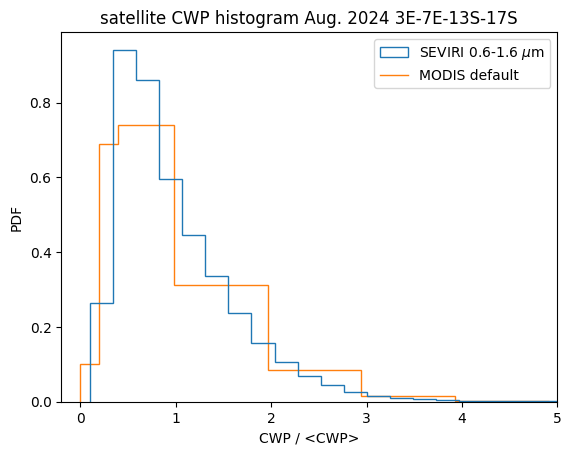

In [7]:

#SEVIRI
seviri = xr.open_mfdataset(pgsdir + "/SEVIRI_CWP/ORD57328/CPP*.nc") # august 2024, Namibian region (3E-7E, 13S-17S)

# (seviri.cwp, seviri.cot, seviri.cph, '0.6-3.9 $\mu$m'),  3.9um is not used, because 1.6 is more accurate (Roebeling et al., 2006, za Kniffka et al. 2014)
# poza tym daje wartosci zupelnie inne niz 1.6 i niz MODIS (LWP 2 razy wieksze)
# zreszta Seethala 2018 tez uywa tylko 1.6
for cwp, cot, cph, label in [(seviri.cwp_16, seviri.cot_16, seviri.cph_16, 'SEVIRI 0.6-1.6 $\mu$m')]:        
    #cwp *= 1e3    #to g/m2
    cwp = cwp.where(seviri.record_status == 0) # remove points flagged as bad
    cwp = cwp.where(cot > 3) # remove thin clouds to minimize r_eff weighing (Seethala et al. 2017), doesnt make much difference 
    cwp = cwp.where(cph == 1) # remove clear-sky and ice pixels (only liquid water remains), doesnt make much difference
    
    #xr.plot.hist(cwp*1e3, bins=60, histtype='step', density=True, label=label)
    xr.plot.hist(cwp / cwp.mean(), bins=60, histtype='step', density=True, label=label)
    
#MODIS
modis_cwp = {}
modis_cwp['aqua'] = {}
modis_cwp['aqua']['default'] = xr.open_dataset(pgsdir + "/MODIS_CWP/CLDPROP_M3_MODIS_Aqua.A2024214.011.2024252000409.nc", group="/Cloud_Water_Path_Liquid/")#, engine='h5netcdf') # august 2024, L3 monthly product with histogram, entire earth
#modis_cwp['aqua']['16'] = xr.open_dataset("/home/piotr/praca/NextGEMS/LES_Smg/MODIS_CWP/CLDPROP_M3_MODIS_Aqua.A2024214.011.2024252000409.nc", group="/Cloud_Water_Path_16_Liquid/", engine='h5netcdf') 
#modis_cwp['aqua']['37'] = xr.open_dataset("/home/piotr/praca/NextGEMS/LES_Smg/MODIS_CWP/CLDPROP_M3_MODIS_Aqua.A2024214.011.2024252000409.nc", group="/Cloud_Water_Path_37_Liquid/", engine='h5netcdf') 
#modis_cwp['aqua']['PCL'] = xr.open_dataset("/home/piotr/praca/NextGEMS/LES_Smg/MODIS_CWP/CLDPROP_M3_MODIS_Aqua.A2024214.011.2024252000409.nc", group="/Cloud_Water_Path_PCL_Liquid/", engine='h5netcdf')  # PCL to partly-cloud, mniejsze LWP, olewamy
#modis_cwp['aqua']['1621'] = xr.open_dataset("/home/piotr/praca/NextGEMS/LES_Smg/MODIS_CWP/CLDPROP_M3_MODIS_Aqua.A2024214.011.2024252000409.nc", group="/Cloud_Water_Path_1621_Liquid/", engine='h5netcdf') 
modis_bins = modis_cwp['aqua']['default'].Histogram_Counts.Histogram_Bin_Boundaries

# modis cwp is cloud cells only
for key, cwp in modis_cwp['aqua'].items():
    #modis.vardim22
    #modis_cwp_roi = cwp.sel(longitude=177, latitude=77) # 177 is 3E, 77 is 13S
    modis_cwp_roi = cwp.where((cwp.longitude<=187) & (cwp.longitude >=183) & (cwp.latitude<=77) & (cwp.latitude>=73)) # 177 is 3E, 77 is 13S
    #modis_cwp_roi = cwp.where((cwp.longitude<=187) & (cwp.longitude >=183) & (cwp.latitude<=107) & (cwp.latitude>=103)) # 177 is 3E, 77 is 13S
    #modis_cwp_roi.Mean.plot(xlim=(73,77), ylim=(173,177)) # plot mean CWP in the roi
    #modis_cwp_roi = cwp
    #cwp.Mean.plot()
    #modis_cwp_roi.Mean.plot() # plot mean CWP in the roi
    #modis_cwp_roi = modis_cwp_roi 
    counts = modis_cwp_roi.Histogram_Counts.sum(dim='longitude').sum(dim='latitude') # sum over all cells in the ROI
    modis_scaled_bins = modis_bins / modis_cwp_roi.Mean.mean().values
    #pdf = counts / (np.diff(modis_bins) * counts.sum().values) # normalize the data to get a PDF, unscaled
    #plt.stairs(pdf, modis_bins, label='MODIS ' + key)
    pdf = counts / (np.diff(modis_scaled_bins) * counts.sum().values) # normalize the data to get a PDF, scaled by mean lwp
    plt.stairs(pdf, modis_scaled_bins, label='MODIS ' + key)

#UWLCM results
#bins = np.arange(5, 500, 20) # NOTE: clear-sky (<5 g/m2) excluded
#for simname in data:
#    (ts, te) = averaging_period[simname]
#    _data = data[simname]
#    _data = _data.where(_data.t>ts*3600).where(_data.t<=te*3600)
#    xr.plot.hist(_data.lwp, label=simname, bins=bins, histtype='step', density=True, **plot_params[simname])
    
#modis.Mean.plot()

#PLOT PARAMETERS
#plt.yscale('log')
#plt.xlabel('CWP [g/m$^2$]')
plt.xlabel('CWP / <CWP>')
plt.ylabel('PDF')
plt.title('satellite CWP histogram Aug. 2024 3E-7E-13S-17S')
plt.legend()
plt.xlim(-20. / 100, 500. / 100)
#plt.savefig(figoutdir+"/histograms/satellite_"+str(outname)+"_lwp_histogram.png", dpi=300)
plt.savefig(figoutdir+"/histograms/satellite_lwp_scaled_histogram.png", dpi=300)
plt.show()

## LWP spectra ##

<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_5854/1529829405.py:15: SyntaxWarning: invalid escape sequence '\m'
  for cwp, cot, cph, label in [(seviri.cwp_16, seviri.cot_16, seviri.cph_16, 'SEVIRI 0.6-1.6 $\mu$m')]:
/tmp/ipykernel_5854/1529829405.py:28: RuntimeWarning: divide by zero encountered in divide
  lmbdx = 1 / Kx
/tmp/ipykernel_5854/1529829405.py:29: RuntimeWarning: divide by zero encountered in divide
  lmbdy = 1 / Ky
/tmp/ipykernel_5854/1529829405.py:52: RuntimeWarning: divide by zero encountered in power
  plt.loglog(lmbdx, 2e-7* Kx**(-5./3.) )


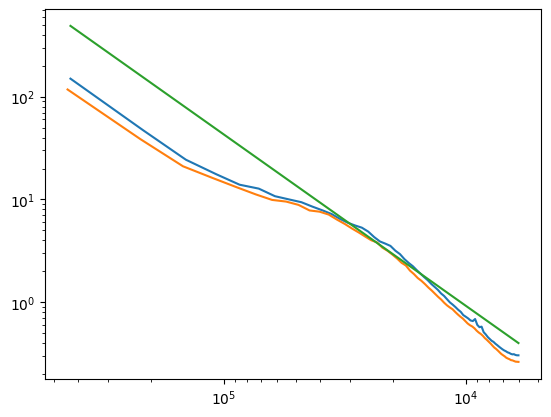

In [12]:
#SEVIRI
seviri = xr.open_mfdataset(pgsdir + "/SEVIRI_CWP/ORD57328/CPP*.nc") # august 2024, Namibian region (3E-7E, 13S-17S)

# (seviri.cwp, seviri.cot, seviri.cph, '0.6-3.9 $\mu$m'),  3.9um is not used, because 1.6 is more accurate (Roebeling et al., 2006, za Kniffka et al. 2014)
# poza tym daje wartosci zupelnie inne niz 1.6 i niz MODIS (LWP 2 razy wieksze)
# zreszta Seethala 2018 tez uywa tylko 1.6
for cwp, cot, cph, label in [(seviri.cwp_16, seviri.cot_16, seviri.cph_16, 'SEVIRI 0.6-1.6 $\mu$m')]:        
    cwp = cwp.where(seviri.record_status == 0) # remove points flagged as bad
    #cwp = cwp.where(cot > 3) # remove thin clouds to minimize r_eff weighing (Seethala et al. 2017), doesnt make much difference 
    #cwp = cwp.where(cph == 1) # remove clear-sky and ice pixels (only liquid water remains), doesnt make much difference

    cwp = cwp.dropna(dim="time", how="any") * 1e3 # remove framse with nan, cwp in g/m2

    wkx = np.fft.rfft(cwp, axis = 1, norm='forward')  # temp for cwp_t0, use = 1 for full cwp
    wky = np.fft.rfft(cwp, axis = 2, norm='forward') # nx != ny in SEVIRI, probably different resolutions in x and y.
        
    resolution = 3000 # TODO: real resolution
    Kx = np.fft.rfftfreq(len(cwp.y)) / resolution
    Ky = np.fft.rfftfreq(len(cwp.x)) / resolution
    lmbdx = 1 / Kx
    lmbdy = 1 / Ky
        
    #amplitude (exp=1) or power (exp=2) spectrum
    exp=2        
    Ex = (np.abs(wkx) ** exp)
    Ex = np.mean(Ex, axis = 2)
    #Ex = np.mean(Ex, axis = 1) # temp for cwp_t0, use = 2 for full cwp
    Ey = (np.abs(wky) ** exp)
    Ey = np.mean(Ey, axis = 1)
    #Exy = 0.5 * (Ex + Ey)
    ##Exy_avg = Exy.mean(axis=0).mean(axis=1)
    #Exy_avg = Exy.mean(axis=0) # temporal mean
    Ex_avg = Ex.mean(axis=0) 
    Ey_avg = Ey.mean(axis=0) 
    #Exy_avg = Ex

    #print(cwp_t0.values)
    #print(Ex)

    #print(varname, simname, str(Exy_avg[0]))
    plt.loglog(lmbdx, Ex_avg, label='SEVIRI CWP')#, **p)
    plt.loglog(lmbdy, Ey_avg, label='SEVIRI CWP')#, **p)
    if exp == 2:
        plt.loglog(lmbdx, 2e-7* Kx**(-5./3.) )
    plt.gca().invert_xaxis()
    

In [9]:
#MODIS

modis_cwp = {}
modis_cwp['aqua'] = {}
#modis_cwp['aqua']['default'] = xr.open_mfdataset(pgsdir + "/MODIS_CWP/MODIS_CLOUD_L2_NAMIBIAN_AUGUST2024/*.hdf", engine='h5netcdf')#, engine='netcdf4')
#modis_cwp['aqua']['default'] = xr.open_mfdataset(pgsdir + "/MODIS_CWP/MODIS_CLOUD_L2_NAMIBIAN_AUGUST2024/MYD06_L2.A2024214.1435.061.2024221171603.nc", engine='netcdf4')
modis_cwp['aqua']['default'] = xr.open_mfdataset(pgsdir + "/MODIS_CWP/MODIS_CLOUD_L2_NAMIBIAN_AUGUST2024/MYD06_L2.A2024214.1430.061.2024221173039.hdf", engine='netcdf4')
#modis_cwp['aqua']['default'].Latitude.values

#['Cloud_Water_Path']

OSError: [Errno -51] NetCDF: Unknown file format: '/home/piotr/praca/NextGEMS/LES_Smg/MODIS_CWP/MODIS_CLOUD_L2_NAMIBIAN_AUGUST2024/MYD06_L2.A2024214.1430.061.2024221173039.hdf'

In [ ]:
modis_bins = modis_cwp['aqua']['default'].Histogram_Counts.Histogram_Bin_Boundaries

# modis cwp is cloud cells only
for key, cwp in modis_cwp['aqua'].items():
    #modis.vardim22
    #modis_cwp_roi = cwp.sel(longitude=177, latitude=77) # 177 is 3E, 77 is 13S
    modis_cwp_roi = cwp.where((cwp.longitude<=187) & (cwp.longitude >=183) & (cwp.latitude<=77) & (cwp.latitude>=73)) # 177 is 3E, 77 is 13S
    #modis_cwp_roi = cwp.where((cwp.longitude<=187) & (cwp.longitude >=183) & (cwp.latitude<=107) & (cwp.latitude>=103)) # 177 is 3E, 77 is 13S
    #modis_cwp_roi.Mean.plot(xlim=(73,77), ylim=(173,177)) # plot mean CWP in the roi
    #modis_cwp_roi = cwp
    #cwp.Mean.plot()
    #modis_cwp_roi.Mean.plot() # plot mean CWP in the roi
    #modis_cwp_roi = modis_cwp_roi 
    counts = modis_cwp_roi.Histogram_Counts.sum(dim='longitude').sum(dim='latitude') # sum over all cells in the ROI
    modis_scaled_bins = modis_bins / modis_cwp_roi.Mean.mean().values
    #pdf = counts / (np.diff(modis_bins) * counts.sum().values) # normalize the data to get a PDF, unscaled
    #plt.stairs(pdf, modis_bins, label='MODIS ' + key)
    pdf = counts / (np.diff(modis_scaled_bins) * counts.sum().values) # normalize the data to get a PDF, scaled by mean lwp
    plt.stairs(pdf, modis_scaled_bins, label='MODIS ' + key)

#UWLCM results
#bins = np.arange(5, 500, 20) # NOTE: clear-sky (<5 g/m2) excluded
#for simname in data:
#    (ts, te) = averaging_period[simname]
#    _data = data[simname]
#    _data = _data.where(_data.t>ts*3600).where(_data.t<=te*3600)
#    xr.plot.hist(_data.lwp, label=simname, bins=bins, histtype='step', density=True, **plot_params[simname])
    
#modis.Mean.plot()

#PLOT PARAMETERS
#plt.yscale('log')
#plt.xlabel('CWP [g/m$^2$]')
plt.xlabel('CWP / <CWP>')
plt.ylabel('PDF')
plt.title('satellite CWP histogram Aug. 2024 3E-7E-13S-17S')
plt.legend()
plt.xlim(-20. / 100, 500. / 100)
#plt.savefig(figoutdir+"/histograms/satellite_"+str(outname)+"_lwp_histogram.png", dpi=300)
plt.savefig(figoutdir+"/histograms/satellite_lwp_scaled_histogram.png", dpi=300)
plt.show()

AttributeError: 'DataArray' object has no attribute 'Histogram_Counts'